In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
def download_data(stock, start, end):
    ticker = yf.download(stock, start, end)
    return pd.DataFrame(ticker)

In [53]:
def calculate_atr(data):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] -  data['Close'].shift())
    low_close = np.abs(data['Low'] -  data['Close'].shift())
    
    # Concatenation function with axis=0 stacks the first DataFrame over the second (Not what we want!)
    # With axis=1 both DataFrames are put along each other (This is what we want)
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    print(ranges)
    
    # With axis=0 it finds the maximum for each column
    # With axis=1 it finds the maximum for each row
    true_ranges = np.max(ranges, axis=1)
    
    # atr = true_ranges.rolling(14).sum() / 14  
    
    return true_ranges.rolling(14).mean()

[*********************100%***********************]  1 of 1 completed
                   0         1         2
Date                                    
2016-04-01  1.000000       NaN       NaN
2016-04-04  1.120003  0.940002  0.180000
2016-04-05  1.139999  0.030006  1.170006
2016-04-06  1.159996  1.250000  0.090004
2016-04-07  1.119995  0.139999  1.259995
...              ...       ...       ...
2021-03-25  2.000000  0.160000  1.840000
2021-03-26  1.259998  1.599998  0.340000
2021-03-29  1.079998  0.110001  0.969997
2021-03-30  0.869999  0.040001  0.910000
2021-03-31  0.830002  0.059998  0.889999

[1259 rows x 3 columns]
                   0         1         2
Date                                    
2016-04-01  1.000000       NaN       NaN
2016-04-04  1.120003  0.940002  0.180000
2016-04-05  1.139999  0.030006  1.170006
2016-04-06  1.159996  1.250000  0.090004
2016-04-07  1.119995  0.139999  1.259995
...              ...       ...       ...
2021-03-25  2.000000  0.160000  1.840000
2021

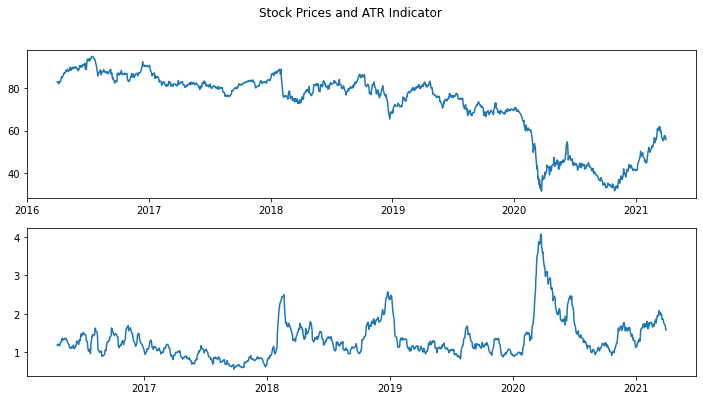

In [58]:
if __name__ == '__main__':
    start_date = datetime.datetime(2016, 4, 1)
    end_date = datetime.datetime(2021, 4, 1)
    
    stock_data = download_data('XOM', start_date, end_date)
    calculate_atr(stock_data)
    atr_values = calculate_atr(stock_data)
    
    # subplots to visulize data
    fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))
    fig.suptitle('Stock Prices and ATR Indicator')
    ax1.plot(stock_data['Close'])
    ax2.plot(atr_values)
    plt.show()